# Homework 5, Part 1: Building a pandas cheat sheet

**Use `animals.csv` to answer the following questions.** The data is small and the questions are pretty simple, so hopefully you can use this for pandas reference in the future.

## 0) Setup

Import pandas **with the correct name**.

In [3]:
!pip install pandas matplotlib


     |████████████████████████████████| 9.7 MB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 1.6 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import pandas as pd
import matplotlib

## 1) Reading in a csv file

Use pandas to read in the animals CSV file, saving it as a variable with the normal name for a dataframe

In [2]:
df = pd.read_csv('data/animals.csv')
df

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50
4,cat,Charlie,32
5,dog,Fontaine,35
6,cat,Xypher,10


## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   animal  7 non-null      object
 1   name    7 non-null      object
 2   length  7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 296.0+ bytes


## 3) Display the first 3 animals

Hmmm, we know how to take the first 5, but maybe the first 3. Maybe there is an option to change how many you get? Use `?` to check the documentation on the command.

In [4]:
df[:3]

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65


In [5]:
df.head(3)

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65


## 4) Sort the animals to show me the 3 longest animals

> **TIP:** You can use `.head()` after you sort things!

In [6]:
df.sort_values(by='length',ascending=False).head(3)

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
1,cat,Bob,45


## 5) Get the mean and standard deviation of animal lengths

You can do this with separate commands or with a single command.

In [27]:
mean = round(df['length'].mean())
stdev = round(df['length'].std())

print(f'The mean is {mean} and the standard deviation is {stdev}')

The mean is 39 and the standard deviation is 17


## 6) How many cats do we have and how many dogs?

You only need one command to do this

In [37]:
df.groupby(by='animal').count()['name']

animal
cat    4
dog    3
Name: name, dtype: int64

## 7) Only display the dogs

> **TIP:** It's probably easiest to make it display the list of `True`/`False` first, then wrap the `df[]` around it.

In [7]:
df[df['animal'] == 'dog']

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


## 8) Only display the animals that are longer than 40cm

In [44]:
df[df['length'] > 40]

,animal,name,length
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50


## 9) `length` is the animal's length in centimeters. Create a new column called `inches` that is the length in inches.

In [7]:
df['inches'] = (df['length'] * 0.393701).round()

df

,animal,name,length,inches
0,cat,Anne,35,14.0
1,cat,Bob,45,18.0
2,dog,Egglesburg,65,26.0
3,dog,Devon,50,20.0
4,cat,Charlie,32,13.0
5,dog,Fontaine,35,14.0
6,cat,Xypher,10,4.0


## 10) Save the cats to a separate variable called `cats`. Save the dogs to a separate variable called `dogs`.

This is the same as listing them, but you just save the result to a variable instead of looking at it. Be sure to use `.head()` to make sure your data looks right.

Once you do this, every time you use `cats` you'll only be talking about the cats, and same for the dogs.

In [8]:
dogs = df[df['animal'] == 'dog']
cats = df[df['animal'] == 'cat']

In [56]:
dogs

,animal,name,length,inches
2,dog,Egglesburg,65,26.0
3,dog,Devon,50,20.0
5,dog,Fontaine,35,14.0


In [57]:
cats

,animal,name,length,inches
0,cat,Anne,35,14.0
1,cat,Bob,45,18.0
4,cat,Charlie,32,13.0
6,cat,Xypher,10,4.0


## 11) Display all of the animals that are cats and above 12 inches long.

First do it using the `cats` variable, then also do it using your `df` dataframe.

> **TIP:** For multiple conditions, you use `df[(one condition) & (another condition)]`

In [58]:
cats[cats['inches'] > 12]

,animal,name,length,inches
0,cat,Anne,35,14.0
1,cat,Bob,45,18.0
4,cat,Charlie,32,13.0


In [59]:
df[(df['inches'] > 12)&(df['animal'] == 'cat')]

,animal,name,length,inches
0,cat,Anne,35,14.0
1,cat,Bob,45,18.0
4,cat,Charlie,32,13.0


## 12) What's the mean length of a cat? What's the mean length of a dog?

In [63]:
cats['length'].mean()

30.5

In [64]:
dogs['length'].mean()

50.0

## 13) If you didn't already, use `groupby` to do #12 all at once

In [67]:
df.groupby(by='animal').mean()['length']

animal
cat    30.5
dog    50.0
Name: length, dtype: float64

## 14) Make a histogram of the length of dogs.

We didn't talk about how to make a histogram in class! It **does not** use `plot()`. Imagine you're a programmer who doesn't want to type out `histogram` - what do you think you'd type instead?

> **TIP:** The method is four letters long
>
> **TIP:** First you'll say "I want the length column," then you'll say "make a histogram"
>
> **TIP:** This is the worst histogram ever

<AxesSubplot:>

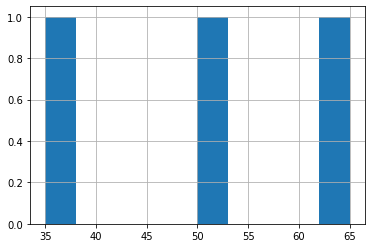

In [73]:
dogs['length'].hist()

## 15) Make a horizontal bar graph of the length of the animals, with the animal's name as the label

> **TIP:** It isn't `df['length'].plot()`, because it needs *both* columns. Think about how we did the scatterplot in class.
>
> **TIP:** Which is the `x` axis and which is the `y` axis? You'll notice pandas is kind of weird and wrong.
>
> **TIP:** Make sure you specify the `kind` of graph or else it will be a weird line thing
>
> **TIP:** If you want, you can set a custom size for your plot by sending it something like `figsize=(15,2)`

<AxesSubplot:ylabel='name'>

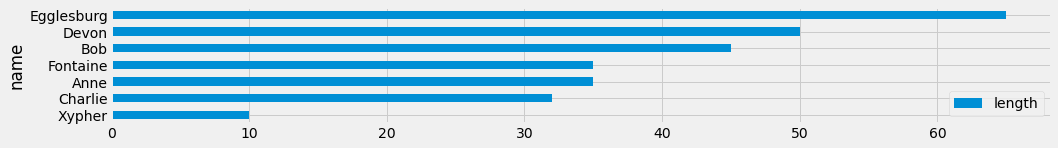

In [92]:
df.sort_values(by='length').plot.barh(x='name',y='length',figsize=(15,2))

## 16) Make a sorted horizontal bar graph of the cats, with the larger cats on top

> **TIP:** Think in steps, even though it's all on one line - first make sure you can sort it, then try to graph it.

<AxesSubplot:ylabel='name'>

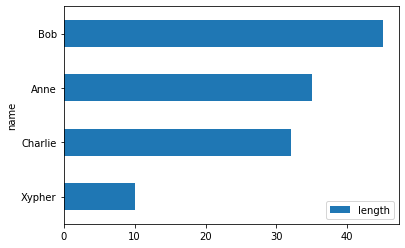

In [90]:
cats.sort_values(by='length').plot.barh(x='name',y='length')

## 17) As a reward for getting down here: run the following code, then plot the number of dogs vs. the number of cats

> **TIP:** Counting the number of dogs and number of cats does NOT use `.groupby`! That's only for calculations.
>
> **TIP:** You can set a title with `title="Number of animals"`

In [91]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<AxesSubplot:title={'center':'Number of animals'}, ylabel='animal'>

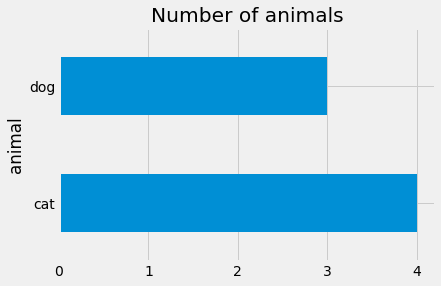

In [102]:
df.groupby(by='animal').count()['name'].plot.barh(x='name',y='length',title="Number of animals")